In [24]:
from collections import Counter
from pandas import ExcelWriter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Heiti TC']

def init(fileName):
    filename="./_target/"+fileName+"reslut.xls"
    # filename="./_target/"+fileName+".xlsx"
    file = pd.read_excel(filename)
    tmp_data=[]
    tmp_data.append(file)
    print(i + str(len(file)))
    #print(file.head())
    return file
    # print(file.head(1))
    # print(pie.keys())

    

In [25]:
def run_img(file,target):

    tend=file["property"]
    pie=Counter(tend)

    labels = ['管理', '服務', '分析']
    sizes = []
    # print( pie.items())
    for x, y in zip(pie,labels):
        # print(pie[y])
        sizes.append(pie[y])

    # Plot
    mycolors = ["#A6A5A4", "#3C3D3E", "#EEEEEE"]
    match_max=max(sizes)
    match_min=min(sizes)
    def autoSplit(match_max,match_min):
        explode=()# * it is a tuple 
        for i in sizes:
            if  i == match_max :
                explode=explode+(0.1,) # we can chain up a tuple by using +
            elif i == match_min :
                explode=explode+(0.2,)
            else :
                explode=explode+(0,)
        return explode
    explode = autoSplit(match_max,match_min)

    plt.pie(sizes, labels=labels,shadow = True,autopct='%1.1f%%',startangle=90,colors=mycolors,explode=explode)

    plt.axis('equal')
    plt.legend(title=target)
    plt.savefig("./anaylysis_img/PieChart_"+target+'.png',dpi=300)
    plt.show()


In [26]:
def run_chart(file,target):

    time=file['申請日']
    prop=file['property']
    time_cnt={}
    
    #print(time.year()
    for t in time:
        year=t.split('/')
        time_cnt[year[0]]=[]
        # // print(t.year)
        # time_cnt[t.year]=[]

    # * =========---------===========
    for t,p in zip(time,prop):
        year=t.split('/')
        time_cnt[year[0]].append(p)
        # time_cnt[t.year].append(p)
        # //print(year)
    # define drawaing elements    
    y=[]
    x1=[]#服務
    x2=[]#管理
    x3=[]#分析
    
    for i in time_cnt:  
        time_cnt[i]=Counter(time_cnt[i]).most_common(3)
    time_cnt=sorted(time_cnt.items())
    #print(time_cnt)
    for i in time_cnt:      
        print(i)
        ## the argument only have 3 objects
        y.append(i[0])
        # print(time_cnt[i])
        for j in i[1]:
            # print (j)
            if(j[0]=="服務"):
                x1.append(j[1])
            if(j[0]=="管理"):
                x2.append(j[1])
            if(j[0]=="分析"):
                x3.append(j[1])
        ## * chekck the 0 value 
        if(len(y)!=len(x1)):
            x1.append(0)
        if(len(y)!=len(x2)):
            x2.append(0)
        if(len(y)!=len(x3)):
            x3.append(0)
    print(y)
    #* get the cumulative value 
    # for i in range (1,len(y)):
    #     x1[i]=x1[i-1]+x1[i]
    #     x2[i]=x2[i-1]+x2[i]
    #     x3[i]=x3[i-1]+x3[i]



    print("服務")
    print(x1) 
    print("管理")
    print(x2) 
    print("分析")
    print(x3) 
    #"#A6A5A4", "#3C3D3E", "#000000"
    ## * Drawing process
    fig =plt.figure()
    fig.suptitle(target,fontsize=20, fontweight='bold')
    ax=fig.add_subplot()
    ax.set_xlabel("years")
    ax.set_ylabel("num of patents")
    ax.plot(y,x1,color="#6C9FCE",linestyle='-',marker='.',label="服務")
    ax.plot(y,x2,color="#003153",linestyle='-',marker='.',label="管理")
    ax.plot(y,x3,color="#00808C",linestyle='-',marker='.',label="分析")
    ax.grid(True)
    plt.legend()
    plt.savefig("./anaylysis_img/"+target+'.png',dpi=300)
    plt.show()

        

In [27]:
def run_compare(file,target):
    prop=file['property']
    get=Counter(prop).most_common(3)
    tmp={}
    tmp[target]=get
    #print(tmp)
    return tmp 

中信金控300
('2003', [('管理', 1)])
('2004', [('服務', 1), ('分析', 1)])
('2005', [('服務', 1)])
('2006', [('服務', 2)])
('2009', [('服務', 1)])
('2011', [('服務', 1)])
('2016', [('服務', 1), ('管理', 1)])
('2017', [('服務', 26), ('管理', 23), ('分析', 9)])
('2018', [('服務', 38), ('管理', 31), ('分析', 9)])
('2019', [('管理', 38), ('分析', 20), ('服務', 20)])
('2020', [('管理', 29), ('分析', 17), ('服務', 16)])
('2021', [('管理', 8), ('服務', 3), ('分析', 3)])
['2003', '2004', '2005', '2006', '2009', '2011', '2016', '2017', '2018', '2019', '2020', '2021']
服務
[0, 1, 2, 4, 5, 6, 7, 33, 71, 91, 107, 110]
管理
[1, 1, 1, 1, 1, 1, 2, 25, 56, 94, 123, 131]
分析
[0, 1, 1, 1, 1, 1, 1, 10, 19, 39, 56, 59]


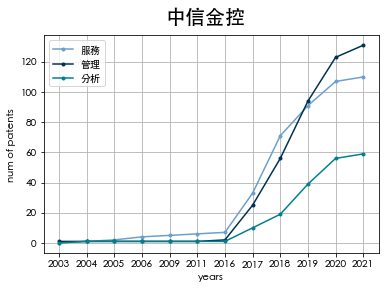

兆豐金控302
('2016', [('管理', 3), ('服務', 3)])
('2017', [('服務', 49), ('管理', 32), ('分析', 8)])
('2018', [('服務', 37), ('管理', 20), ('分析', 16)])
('2019', [('服務', 31), ('管理', 14), ('分析', 8)])
('2020', [('服務', 31), ('管理', 28), ('分析', 9)])
('2021', [('服務', 11), ('管理', 2)])
['2016', '2017', '2018', '2019', '2020', '2021']
服務
[3, 52, 89, 120, 151, 162]
管理
[3, 35, 55, 69, 97, 99]
分析
[0, 8, 24, 32, 41, 41]


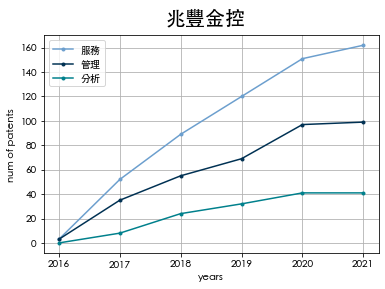

台新金控76
('2016', [('服務', 18)])
('2017', [('服務', 9), ('管理', 2), ('分析', 2)])
('2018', [('服務', 6), ('管理', 1)])
('2019', [('服務', 15), ('管理', 9), ('分析', 3)])
('2020', [('服務', 7), ('管理', 3), ('分析', 1)])
['2016', '2017', '2018', '2019', '2020']
服務
[18, 27, 33, 48, 55]
管理
[0, 2, 3, 12, 15]
分析
[0, 2, 2, 5, 6]


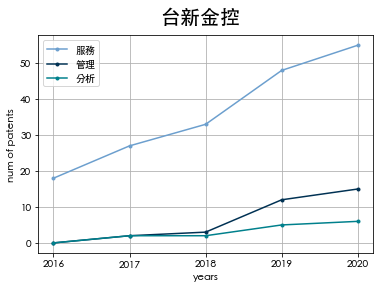

台灣金融控股340
('2016', [('服務', 1)])
('2017', [('服務', 22), ('管理', 6), ('分析', 2)])
('2018', [('管理', 24), ('服務', 21), ('分析', 14)])
('2019', [('服務', 85), ('管理', 41), ('分析', 29)])
('2020', [('服務', 41), ('分析', 24), ('管理', 21)])
('2021', [('服務', 8), ('管理', 1)])
['2016', '2017', '2018', '2019', '2020', '2021']
服務
[1, 23, 44, 129, 170, 178]
管理
[0, 6, 30, 71, 92, 93]
分析
[0, 2, 16, 45, 69, 69]


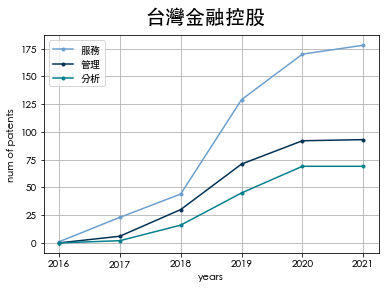

國泰金控160
('2005', [('服務', 1)])
('2013', [('服務', 1)])
('2014', [('服務', 7), ('管理', 5), ('分析', 1)])
('2015', [('服務', 3), ('管理', 2)])
('2016', [('管理', 15), ('服務', 12), ('分析', 7)])
('2017', [('管理', 28), ('服務', 14), ('分析', 6)])
('2018', [('管理', 10), ('分析', 3), ('服務', 2)])
('2019', [('服務', 7), ('管理', 6), ('分析', 5)])
('2020', [('管理', 11), ('分析', 6), ('服務', 6)])
('2021', [('分析', 1), ('服務', 1)])
['2005', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
服務
[1, 2, 9, 12, 24, 38, 40, 47, 53, 54]
管理
[0, 0, 5, 7, 22, 50, 60, 66, 77, 77]
分析
[0, 0, 1, 1, 8, 14, 17, 22, 28, 29]


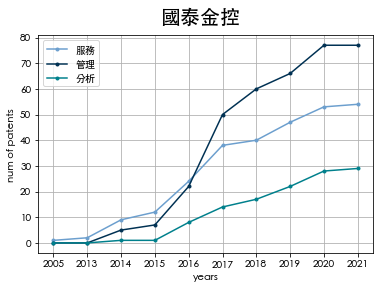

第一金控114
('2016', [('服務', 16), ('管理', 15)])
('2017', [('管理', 9), ('服務', 6), ('分析', 3)])
('2018', [('管理', 8), ('分析', 3), ('服務', 1)])
('2019', [('服務', 20), ('管理', 14), ('分析', 6)])
('2020', [('服務', 5), ('分析', 4), ('管理', 2)])
('2021', [('服務', 1), ('管理', 1)])
['2016', '2017', '2018', '2019', '2020', '2021']
服務
[16, 22, 23, 43, 48, 49]
管理
[15, 24, 32, 46, 48, 49]
分析
[0, 3, 6, 12, 16, 16]


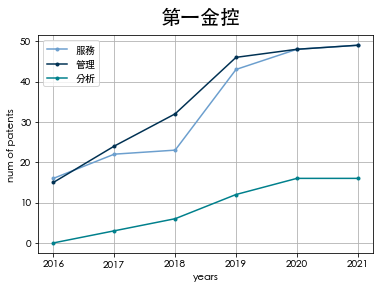

玉山金控74
('2006', [('服務', 1)])
('2008', [('管理', 1)])
('2015', [('管理', 1), ('服務', 1)])
('2016', [('服務', 2)])
('2017', [('分析', 1), ('管理', 1)])
('2018', [('管理', 6), ('服務', 3), ('分析', 2)])
('2019', [('服務', 16), ('管理', 4), ('分析', 1)])
('2020', [('服務', 13), ('分析', 12), ('管理', 6)])
('2021', [('服務', 2), ('分析', 1)])
['2006', '2008', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
服務
[1, 1, 2, 4, 4, 7, 23, 36, 38]
管理
[0, 1, 2, 2, 3, 9, 13, 19, 19]
分析
[0, 0, 0, 0, 1, 3, 4, 16, 17]


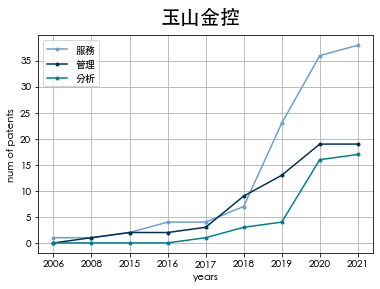

富邦金控118
('2013', [('服務', 1)])
('2015', [('分析', 1)])
('2016', [('服務', 15), ('分析', 7), ('管理', 5)])
('2017', [('管理', 8), ('服務', 5), ('分析', 3)])
('2018', [('管理', 9), ('分析', 4), ('服務', 4)])
('2019', [('分析', 13), ('管理', 9), ('服務', 8)])
('2020', [('服務', 9), ('管理', 7), ('分析', 4)])
('2021', [('管理', 3), ('分析', 2), ('服務', 1)])
['2013', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
服務
[1, 1, 16, 21, 25, 33, 42, 43]
管理
[0, 0, 5, 13, 22, 31, 38, 41]
分析
[0, 1, 8, 11, 15, 28, 32, 34]


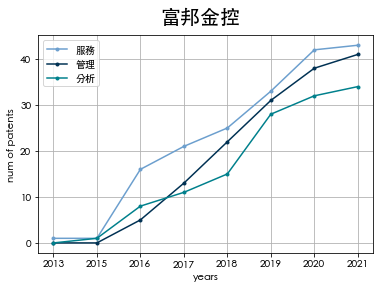

新光金控38
('2017', [('分析', 1)])
('2018', [('服務', 3)])
('2019', [('服務', 5), ('管理', 5), ('分析', 1)])
('2020', [('服務', 9), ('分析', 7), ('管理', 3)])
('2021', [('管理', 3), ('服務', 1)])
['2017', '2018', '2019', '2020', '2021']
服務
[0, 3, 8, 17, 18]
管理
[0, 0, 5, 8, 11]
分析
[1, 1, 2, 9, 9]


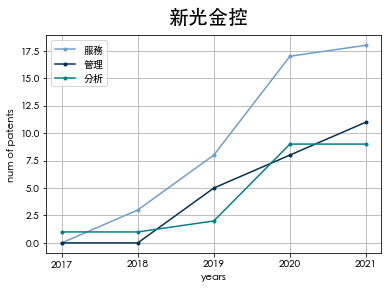

In [22]:
store =[]
for i in ["中信金控","兆豐金控","台新金控","台灣金融控股","國泰金控","第一金控","玉山金控","富邦金控","新光金控"]:
# for i in["專利彙整"]:
    file = init(i)
#     store.append(run_compare(file,i))
# df=pd.DataFrame(store)
# df.to_excel("./_target/rrrrreslut.xls")
    # run_img(file,i)
    run_chart(file,i)
    
    

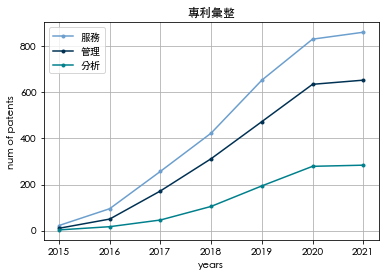

In [23]:
y=[ 2015, 2016, 2017, 2018, 2019, 2020, 2021]

x1=[ 22, 95, 257, 423, 653, 831, 861]

x2=[ 10, 50, 172, 312, 473, 635, 653]

x3=[ 3, 17, 46, 105, 194, 279, 284]
plt.title("專利彙整")
plt.xlabel("years")
plt.ylabel("num of patents")
plt.plot(y,x1,color="#6C9FCE",linestyle='-',marker='.',label="服務")
plt.plot(y,x2,color="#003153",linestyle='-',marker='.',label="管理")
plt.plot(y,x3,color="#00808C",linestyle='-',marker='.',label="分析")
plt.grid(True)
plt.legend()
plt.savefig("./anaylysis_img/"+"presum專利彙整"+'.png',dpi=300)